In [1]:
#visualisasi
import plotly.express as px
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
# % matplotlib inline

#prerocessing
from collections import OrderedDict

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from datetime import datetime

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

#encoder
from sklearn.preprocessing import LabelEncoder

#split data
from sklearn.model_selection import train_test_split

#feture engineering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

#modeling
from sklearn.svm import SVC

#evaluation model
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix, accuracy_score, classification_report    
from sklearn.model_selection import StratifiedKFold
from datetime import datetime

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RanggaSaputra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#baca dokumen
import pandas as pd
df_data = pd.read_csv('./data_lazada/20191002-reviews.csv')

In [3]:
df_data.head()

itemId                 category             name  rating  \
0  100002528  beli-harddisk-eksternal         Kamal U.       5   
1  100002528  beli-harddisk-eksternal       yofanca m.       4   
2  100002528  beli-harddisk-eksternal  Lazada Customer       5   
3  100002528  beli-harddisk-eksternal  Lazada Customer       4   
4  100002528  beli-harddisk-eksternal         Yosep M.       5   

   originalRating                                  reviewTitle  \
0             NaN                                          NaN   
1             NaN                                          NaN   
2             NaN  ok mantaaapppp barang sesuai pesanan.. good   
3             NaN                                          NaN   
4             NaN                                          NaN   

                      reviewContent  likeCount  upVotes  downVotes  helpful  \
0   bagus  mantap dah sesui pesanan          0        0          0     True   
1                Bagus, sesuai foto          0        0          0     True   
2  okkkkk mantaaaaaaapppp ... goood          0        0          0     True   
3                      bagus sesuai          0        0          0     True   
4                               NaN          0        0          0     True   

   relevanceScore   boughtDate  clientType retrievedDate  
0           26.51  09 Apr 2019  androidApp    2019-10-02  
1           22.49  24 Sep 2017  androidApp    2019-10-02  
2           21.50  04 Apr 2018  androidApp    2019-10-02  
3           20.51  22 Sep 2017  androidApp    2019-10-02  
4           16.01  17 Agu 2018  androidApp    2019-10-02

In [4]:
#Cek info data
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203787 entries, 0 to 203786
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   itemId          203787 non-null  int64  
 1   category        203787 non-null  object 
 2   name            203787 non-null  object 
 3   rating          203787 non-null  int64  
 4   originalRating  8 non-null       float64
 5   reviewTitle     23404 non-null   object 
 6   reviewContent   107029 non-null  object 
 7   likeCount       203787 non-null  int64  
 8   upVotes         203787 non-null  int64  
 9   downVotes       203787 non-null  int64  
 10  helpful         203787 non-null  bool   
 11  relevanceScore  203787 non-null  float64
 12  boughtDate      196680 non-null  object 
 13  clientType      203787 non-null  object 
 14  retrievedDate   203787 non-null  object 
dtypes: bool(1), float64(2), int64(5), object(7)
memory usage: 22.0+ MB


In [5]:
#Pilih fitur yang akan digunakan
new_data = df_data[['category', 'name', 'rating', 'reviewTitle','reviewContent']]
new_data.head()

category             name  rating  \
0  beli-harddisk-eksternal         Kamal U.       5   
1  beli-harddisk-eksternal       yofanca m.       4   
2  beli-harddisk-eksternal  Lazada Customer       5   
3  beli-harddisk-eksternal  Lazada Customer       4   
4  beli-harddisk-eksternal         Yosep M.       5   

                                   reviewTitle  \
0                                          NaN   
1                                          NaN   
2  ok mantaaapppp barang sesuai pesanan.. good   
3                                          NaN   
4                                          NaN   

                      reviewContent  
0   bagus  mantap dah sesui pesanan  
1                Bagus, sesuai foto  
2  okkkkk mantaaaaaaapppp ... goood  
3                      bagus sesuai  
4                               NaN

In [6]:
#Cek banyak data
len(new_data)

203787

In [7]:
#Hapus data yang ada Missing Value
new_data_clean = new_data.dropna()
new_data_clean.head()

category             name  rating  \
2   beli-harddisk-eksternal  Lazada Customer       5   
7   beli-harddisk-eksternal        nurfarida       1   
9   beli-harddisk-eksternal         agung p.       5   
11  beli-harddisk-eksternal     Lazada Guest       1   
12  beli-harddisk-eksternal           Yan M.       5   

                                    reviewTitle  \
2   ok mantaaapppp barang sesuai pesanan.. good   
7                        ada pengirimn ntb bima   
9                     Barang bagus sesuai specs   
11                          Ini cicil pake apa?   
12               Beli cash sesuai Harga di atas   

                                        reviewContent  
2                    okkkkk mantaaaaaaapppp ... goood  
7                                                bima  
9   Pesan rabu sore,minggu sore sampe,,barang sesu...  
11         Mau tanya ini cicilnya pake apa ya,cc bkn?  
12              Apakah TV. Tsb. Suda ada anti gores..

In [8]:
#Cek banyak data lagi
len(new_data_clean)

21078

In [9]:
#Gabungin 2 fitur data
new_data_clean['reviewJoin']= new_data_clean[['reviewTitle','reviewContent']].apply(lambda x: ' '.join(x), axis=1)
new_data_clean.head()

C:\Users\RanggaSaputra\AppData\Local\Temp\ipykernel_16912\520273255.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data_clean['reviewJoin']= new_data_clean[['reviewTitle','reviewContent']].apply(lambda x: ' '.join(x), axis=1)


category             name  rating  \
2   beli-harddisk-eksternal  Lazada Customer       5   
7   beli-harddisk-eksternal        nurfarida       1   
9   beli-harddisk-eksternal         agung p.       5   
11  beli-harddisk-eksternal     Lazada Guest       1   
12  beli-harddisk-eksternal           Yan M.       5   

                                    reviewTitle  \
2   ok mantaaapppp barang sesuai pesanan.. good   
7                        ada pengirimn ntb bima   
9                     Barang bagus sesuai specs   
11                          Ini cicil pake apa?   
12               Beli cash sesuai Harga di atas   

                                        reviewContent  \
2                    okkkkk mantaaaaaaapppp ... goood   
7                                                bima   
9   Pesan rabu sore,minggu sore sampe,,barang sesu...   
11         Mau tanya ini cicilnya pake apa ya,cc bkn?   
12              Apakah TV. Tsb. Suda ada anti gores..   

                                           reviewJoin  
2   ok mantaaapppp barang sesuai pesanan.. good ok...  
7                         ada pengirimn ntb bima bima  
9   Barang bagus sesuai specs Pesan rabu sore,ming...  
11  Ini cicil pake apa? Mau tanya ini cicilnya pak...  
12  Beli cash sesuai Harga di atas Apakah TV. Tsb....

In [10]:
#casing
new_data_clean['review_clean']= new_data_clean['reviewJoin'].apply(lambda x: str(x).lower())
new_data_clean.head()

C:\Users\RanggaSaputra\AppData\Local\Temp\ipykernel_16912\1789212553.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data_clean['review_clean']= new_data_clean['reviewJoin'].apply(lambda x: str(x).lower())


category             name  rating  \
2   beli-harddisk-eksternal  Lazada Customer       5   
7   beli-harddisk-eksternal        nurfarida       1   
9   beli-harddisk-eksternal         agung p.       5   
11  beli-harddisk-eksternal     Lazada Guest       1   
12  beli-harddisk-eksternal           Yan M.       5   

                                    reviewTitle  \
2   ok mantaaapppp barang sesuai pesanan.. good   
7                        ada pengirimn ntb bima   
9                     Barang bagus sesuai specs   
11                          Ini cicil pake apa?   
12               Beli cash sesuai Harga di atas   

                                        reviewContent  \
2                    okkkkk mantaaaaaaapppp ... goood   
7                                                bima   
9   Pesan rabu sore,minggu sore sampe,,barang sesu...   
11         Mau tanya ini cicilnya pake apa ya,cc bkn?   
12              Apakah TV. Tsb. Suda ada anti gores..   

                                           reviewJoin  \
2   ok mantaaapppp barang sesuai pesanan.. good ok...   
7                         ada pengirimn ntb bima bima   
9   Barang bagus sesuai specs Pesan rabu sore,ming...   
11  Ini cicil pake apa? Mau tanya ini cicilnya pak...   
12  Beli cash sesuai Harga di atas Apakah TV. Tsb....   

                                         review_clean  
2   ok mantaaapppp barang sesuai pesanan.. good ok...  
7                         ada pengirimn ntb bima bima  
9   barang bagus sesuai specs pesan rabu sore,ming...  
11  ini cicil pake apa? mau tanya ini cicilnya pak...  
12  beli cash sesuai harga di atas apakah tv. tsb....

In [11]:
#Import regex
import re

# Mendeteksi pattern dengan Regex
# Format html
html_tag = re.compile(r'<.*?>')

# Format URL
http_link = re.compile(r'https://\S+')
www_link = re.compile(r'www\.\S+')

# Tanda baca yang tidak diperlukan
punctuation = re.compile(r'[^\w\s]') #penggunaan ^ merupakan notasi untuk menunjukkan negasi dimana dalam perintah ini berarti karakter yang bukan huruf dan bukan spasi

# Function untuk memproses cleaning teks data
def data_cleaning(text):
  # menghilangkan html tag
  text = re.sub(html_tag, r'', text)

  # menghilangkan url
  text = re.sub(http_link, r'', text)
  text = re.sub(www_link, r'', text)

  # menghilangkan tanda baca
  text = re.sub(punctuation, r'', text)

  # #menghilangkan double huruf
  # text = "".join(OrderedDict.fromkeys(text))

  return text

In [12]:
#Bersih bersih data
new_data_clean['review_clean'] = new_data_clean['review_clean'].apply(lambda x: data_cleaning(x))
new_data_clean.head()

C:\Users\RanggaSaputra\AppData\Local\Temp\ipykernel_16912\3481251765.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data_clean['review_clean'] = new_data_clean['review_clean'].apply(lambda x: data_cleaning(x))


category             name  rating  \
2   beli-harddisk-eksternal  Lazada Customer       5   
7   beli-harddisk-eksternal        nurfarida       1   
9   beli-harddisk-eksternal         agung p.       5   
11  beli-harddisk-eksternal     Lazada Guest       1   
12  beli-harddisk-eksternal           Yan M.       5   

                                    reviewTitle  \
2   ok mantaaapppp barang sesuai pesanan.. good   
7                        ada pengirimn ntb bima   
9                     Barang bagus sesuai specs   
11                          Ini cicil pake apa?   
12               Beli cash sesuai Harga di atas   

                                        reviewContent  \
2                    okkkkk mantaaaaaaapppp ... goood   
7                                                bima   
9   Pesan rabu sore,minggu sore sampe,,barang sesu...   
11         Mau tanya ini cicilnya pake apa ya,cc bkn?   
12              Apakah TV. Tsb. Suda ada anti gores..   

                                           reviewJoin  \
2   ok mantaaapppp barang sesuai pesanan.. good ok...   
7                         ada pengirimn ntb bima bima   
9   Barang bagus sesuai specs Pesan rabu sore,ming...   
11  Ini cicil pake apa? Mau tanya ini cicilnya pak...   
12  Beli cash sesuai Harga di atas Apakah TV. Tsb....   

                                         review_clean  
2   ok mantaaapppp barang sesuai pesanan good okkk...  
7                         ada pengirimn ntb bima bima  
9   barang bagus sesuai specs pesan rabu soremingg...  
11  ini cicil pake apa mau tanya ini cicilnya pake...  
12  beli cash sesuai harga di atas apakah tv tsb s...

In [13]:
#Stemming
start_time = datetime.now()

factory = StemmerFactory()
stemmer = factory.create_stemmer()

new_data_clean['review_steem'] = new_data_clean['review_clean'].apply(lambda x: stemmer.stem(x))
new_data_clean.head()

end_time = datetime.now()
print('Waktu yang diperlukan: {}'.format(end_time - start_time))

Waktu yang diperlukan: 0:15:22.227490


C:\Users\RanggaSaputra\AppData\Local\Temp\ipykernel_16912\237591081.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data_clean['review_steem'] = new_data_clean['review_clean'].apply(lambda x: stemmer.stem(x))


In [14]:
#stopwords
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

new_data_clean['review_stp_sastrawi'] = new_data_clean['review_steem'].apply(lambda x: " ".join(stopword.remove(x) for x in x.split() ))
new_data_clean.head()

C:\Users\RanggaSaputra\AppData\Local\Temp\ipykernel_16912\1352370177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data_clean['review_stp_sastrawi'] = new_data_clean['review_steem'].apply(lambda x: " ".join(stopword.remove(x) for x in x.split() ))


category             name  rating  \
2   beli-harddisk-eksternal  Lazada Customer       5   
7   beli-harddisk-eksternal        nurfarida       1   
9   beli-harddisk-eksternal         agung p.       5   
11  beli-harddisk-eksternal     Lazada Guest       1   
12  beli-harddisk-eksternal           Yan M.       5   

                                    reviewTitle  \
2   ok mantaaapppp barang sesuai pesanan.. good   
7                        ada pengirimn ntb bima   
9                     Barang bagus sesuai specs   
11                          Ini cicil pake apa?   
12               Beli cash sesuai Harga di atas   

                                        reviewContent  \
2                    okkkkk mantaaaaaaapppp ... goood   
7                                                bima   
9   Pesan rabu sore,minggu sore sampe,,barang sesu...   
11         Mau tanya ini cicilnya pake apa ya,cc bkn?   
12              Apakah TV. Tsb. Suda ada anti gores..   

                                           reviewJoin  \
2   ok mantaaapppp barang sesuai pesanan.. good ok...   
7                         ada pengirimn ntb bima bima   
9   Barang bagus sesuai specs Pesan rabu sore,ming...   
11  Ini cicil pake apa? Mau tanya ini cicilnya pak...   
12  Beli cash sesuai Harga di atas Apakah TV. Tsb....   

                                         review_clean  \
2   ok mantaaapppp barang sesuai pesanan good okkk...   
7                         ada pengirimn ntb bima bima   
9   barang bagus sesuai specs pesan rabu soremingg...   
11  ini cicil pake apa mau tanya ini cicilnya pake...   
12  beli cash sesuai harga di atas apakah tv tsb s...   

                                         review_steem  \
2   ok mantaaapppp barang sesuai pesan good okkkkk...   
7                         ada pengirimn ntb bima bima   
9   barang bagus sesuai specs pesan rabu soremingg...   
11  ini cicil pake apa mau tanya ini cicil pake ap...   
12  beli cash sesuai harga di atas apakah tv tsb s...   

                                  review_stp_sastrawi  
2    mantaaapppp barang sesuai pesan good okkkkk m...  
7                             pengirimn ntb bima bima  
9   barang bagus sesuai specs pesan rabu soremingg...  
11   cicil pake apa mau tanya  cicil pake apa yacc...  
12  beli cash sesuai harga  atas  tv tsb suda  ant...

In [15]:
list_stopwords = set(stopwords.words('indonesian'))
stop = list_stopwords
new_data_clean['review_stp_nltk'] = new_data_clean['review_steem'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
new_data_clean.head()

C:\Users\RanggaSaputra\AppData\Local\Temp\ipykernel_16912\102025546.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data_clean['review_stp_nltk'] = new_data_clean['review_steem'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))


category             name  rating  \
2   beli-harddisk-eksternal  Lazada Customer       5   
7   beli-harddisk-eksternal        nurfarida       1   
9   beli-harddisk-eksternal         agung p.       5   
11  beli-harddisk-eksternal     Lazada Guest       1   
12  beli-harddisk-eksternal           Yan M.       5   

                                    reviewTitle  \
2   ok mantaaapppp barang sesuai pesanan.. good   
7                        ada pengirimn ntb bima   
9                     Barang bagus sesuai specs   
11                          Ini cicil pake apa?   
12               Beli cash sesuai Harga di atas   

                                        reviewContent  \
2                    okkkkk mantaaaaaaapppp ... goood   
7                                                bima   
9   Pesan rabu sore,minggu sore sampe,,barang sesu...   
11         Mau tanya ini cicilnya pake apa ya,cc bkn?   
12              Apakah TV. Tsb. Suda ada anti gores..   

                                           reviewJoin  \
2   ok mantaaapppp barang sesuai pesanan.. good ok...   
7                         ada pengirimn ntb bima bima   
9   Barang bagus sesuai specs Pesan rabu sore,ming...   
11  Ini cicil pake apa? Mau tanya ini cicilnya pak...   
12  Beli cash sesuai Harga di atas Apakah TV. Tsb....   

                                         review_clean  \
2   ok mantaaapppp barang sesuai pesanan good okkk...   
7                         ada pengirimn ntb bima bima   
9   barang bagus sesuai specs pesan rabu soremingg...   
11  ini cicil pake apa mau tanya ini cicilnya pake...   
12  beli cash sesuai harga di atas apakah tv tsb s...   

                                         review_steem  \
2   ok mantaaapppp barang sesuai pesan good okkkkk...   
7                         ada pengirimn ntb bima bima   
9   barang bagus sesuai specs pesan rabu soremingg...   
11  ini cicil pake apa mau tanya ini cicil pake ap...   
12  beli cash sesuai harga di atas apakah tv tsb s...   

                                  review_stp_sastrawi  \
2    mantaaapppp barang sesuai pesan good okkkkk m...   
7                             pengirimn ntb bima bima   
9   barang bagus sesuai specs pesan rabu soremingg...   
11   cicil pake apa mau tanya  cicil pake apa yacc...   
12  beli cash sesuai harga  atas  tv tsb suda  ant...   

                                      review_stp_nltk  
2   ok mantaaapppp barang sesuai pesan good okkkkk...  
7                             pengirimn ntb bima bima  
9   barang bagus sesuai specs pesan rabu soremingg...  
11                     cicil pake cicil pake yacc bkn  
12      beli cash sesuai harga tv tsb suda anti gores

In [16]:
new_data_clean.head()

category             name  rating  \
2   beli-harddisk-eksternal  Lazada Customer       5   
7   beli-harddisk-eksternal        nurfarida       1   
9   beli-harddisk-eksternal         agung p.       5   
11  beli-harddisk-eksternal     Lazada Guest       1   
12  beli-harddisk-eksternal           Yan M.       5   

                                    reviewTitle  \
2   ok mantaaapppp barang sesuai pesanan.. good   
7                        ada pengirimn ntb bima   
9                     Barang bagus sesuai specs   
11                          Ini cicil pake apa?   
12               Beli cash sesuai Harga di atas   

                                        reviewContent  \
2                    okkkkk mantaaaaaaapppp ... goood   
7                                                bima   
9   Pesan rabu sore,minggu sore sampe,,barang sesu...   
11         Mau tanya ini cicilnya pake apa ya,cc bkn?   
12              Apakah TV. Tsb. Suda ada anti gores..   

                                           reviewJoin  \
2   ok mantaaapppp barang sesuai pesanan.. good ok...   
7                         ada pengirimn ntb bima bima   
9   Barang bagus sesuai specs Pesan rabu sore,ming...   
11  Ini cicil pake apa? Mau tanya ini cicilnya pak...   
12  Beli cash sesuai Harga di atas Apakah TV. Tsb....   

                                         review_clean  \
2   ok mantaaapppp barang sesuai pesanan good okkk...   
7                         ada pengirimn ntb bima bima   
9   barang bagus sesuai specs pesan rabu soremingg...   
11  ini cicil pake apa mau tanya ini cicilnya pake...   
12  beli cash sesuai harga di atas apakah tv tsb s...   

                                         review_steem  \
2   ok mantaaapppp barang sesuai pesan good okkkkk...   
7                         ada pengirimn ntb bima bima   
9   barang bagus sesuai specs pesan rabu soremingg...   
11  ini cicil pake apa mau tanya ini cicil pake ap...   
12  beli cash sesuai harga di atas apakah tv tsb s...   

                                  review_stp_sastrawi  \
2    mantaaapppp barang sesuai pesan good okkkkk m...   
7                             pengirimn ntb bima bima   
9   barang bagus sesuai specs pesan rabu soremingg...   
11   cicil pake apa mau tanya  cicil pake apa yacc...   
12  beli cash sesuai harga  atas  tv tsb suda  ant...   

                                      review_stp_nltk  
2   ok mantaaapppp barang sesuai pesan good okkkkk...  
7                             pengirimn ntb bima bima  
9   barang bagus sesuai specs pesan rabu soremingg...  
11                     cicil pake cicil pake yacc bkn  
12      beli cash sesuai harga tv tsb suda anti gores

In [17]:
df = new_data_clean.groupby('category')['rating'].mean()
df = df.sort_values(ascending=False)
fig = px.bar(df,y=df.index, x=df, color=df.index, text_auto='.3s', 
            title="Rating Produk")
fig.show()

In [18]:
df = new_data_clean.groupby('name')['name'].count()
df = df.sort_values(ascending=False)
df = df[:15]
fig = px.bar(df,y=df, x=df.index, text_auto='.3s', color=df.index,
            title="Kategori Berita")
fig.show()

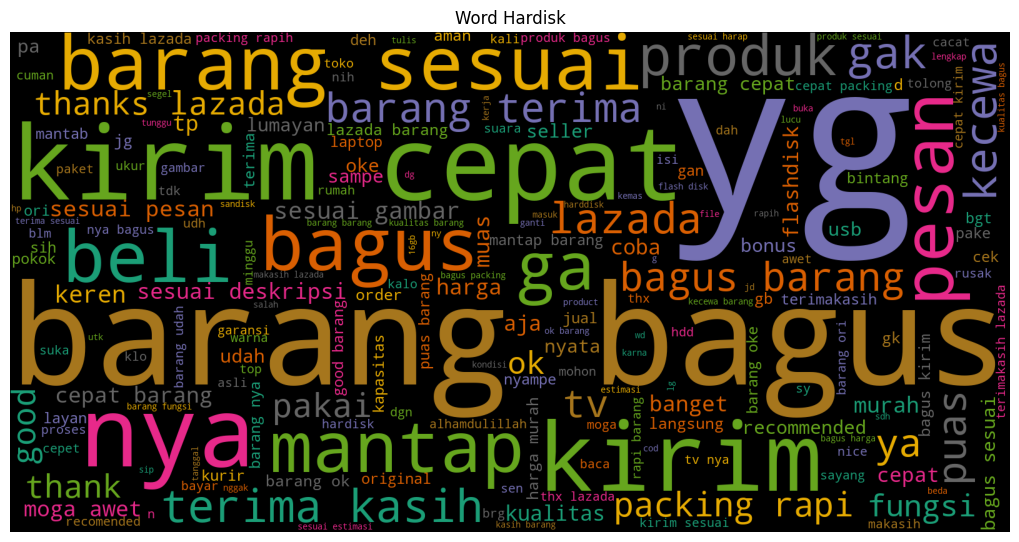

In [19]:
data_ = new_data_clean.loc[(new_data_clean['category'] == "beli-harddisk-eksternal")]
word_ = pd.Series(' '.join(data_['review_stp_nltk']).split())
text = ' '.join(word_)

# Display the generated image:
wordcloud = WordCloud(background_color='black', mode="RGB", width=1600, height=800, colormap="Dark2").generate(text)
plt.figure(figsize=(10,10))
plt.title('Word Hardisk')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

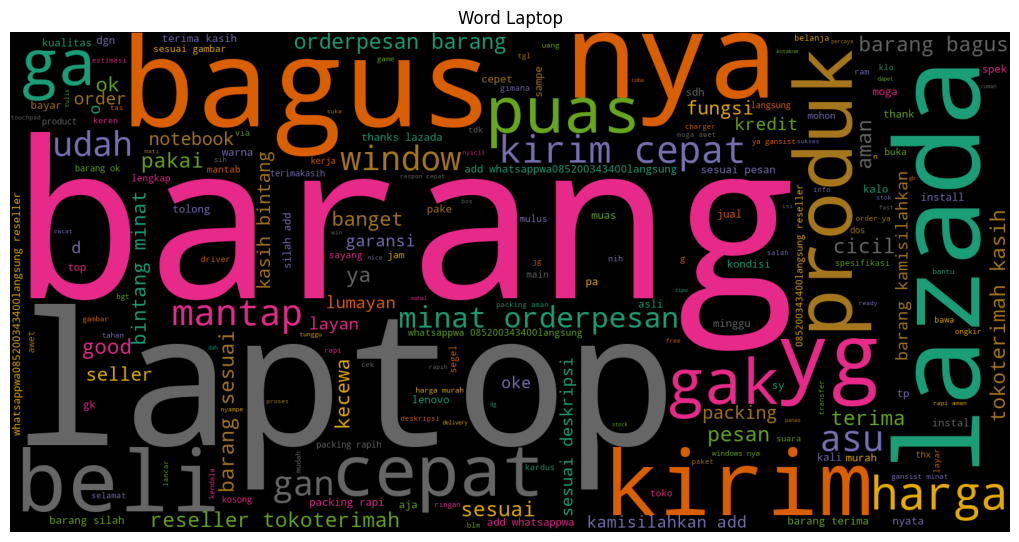

In [20]:
data_ = new_data_clean.loc[(new_data_clean['category'] == "beli-laptop")]
word_ = pd.Series(' '.join(data_['review_stp_nltk']).split())
text = ' '.join(word_)

# Display the generated image:
wordcloud = WordCloud(background_color='black', mode="RGB", width=1600, height=800, colormap="Dark2").generate(text)
plt.figure(figsize=(10,10))
plt.title('Word Laptop')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

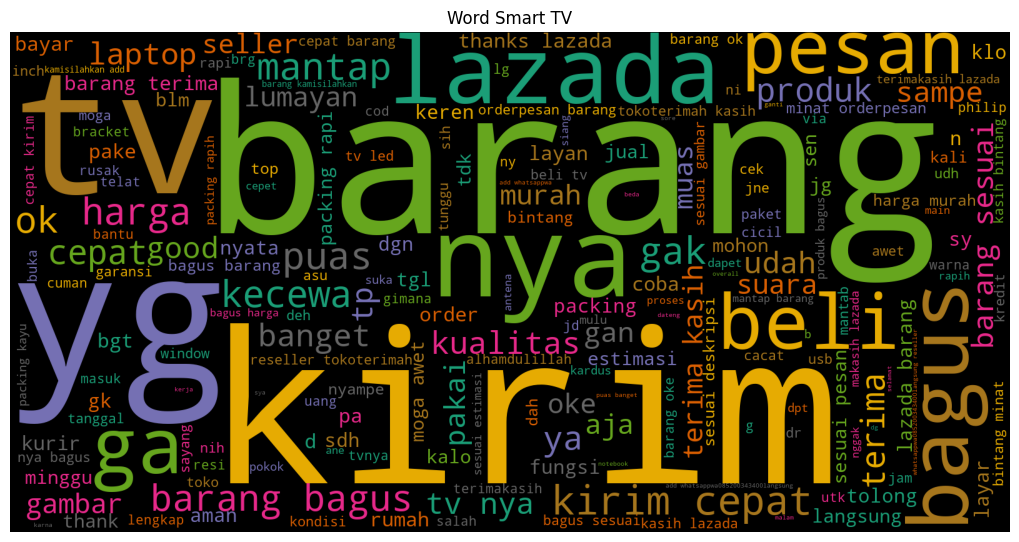

In [21]:
data_ = new_data_clean.loc[(new_data_clean['category'] == "beli-smart-tv")]
word_ = pd.Series(' '.join(data_['review_stp_nltk']).split())
text = ' '.join(word_)

# Display the generated image:
wordcloud = WordCloud(background_color='black', mode="RGB", width=1600, height=800, colormap="Dark2").generate(text)
plt.figure(figsize=(10,10))
plt.title('Word Smart TV')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

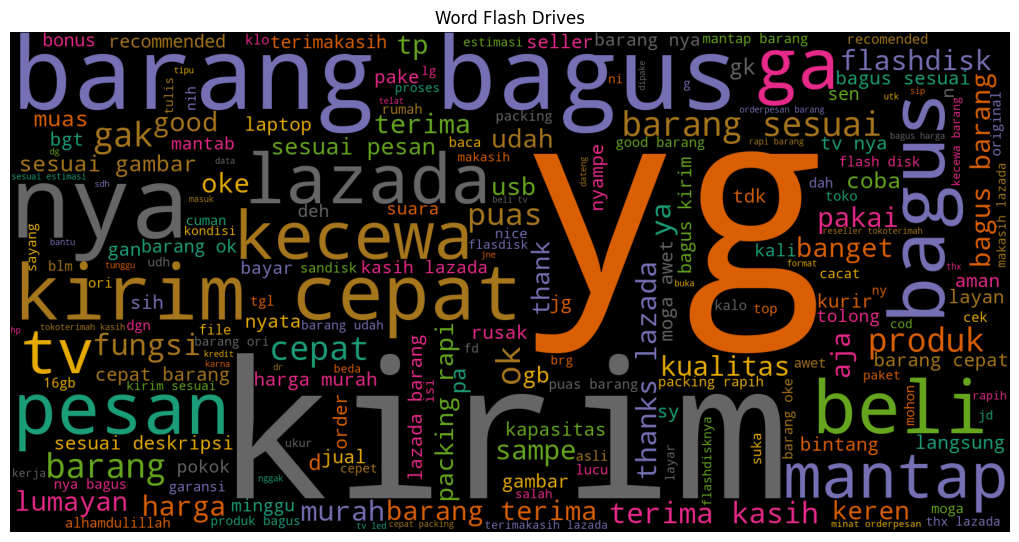

In [22]:
data_ = new_data_clean.loc[(new_data_clean['category'] == "jual-flash-drives")]
word_ = pd.Series(' '.join(data_['review_stp_nltk']).split())
text = ' '.join(word_)

# Display the generated image:
wordcloud = WordCloud(background_color='black', mode="RGB", width=1600, height=800, colormap="Dark2").generate(text)
plt.figure(figsize=(10,10))
plt.title('Word Flash Drives')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

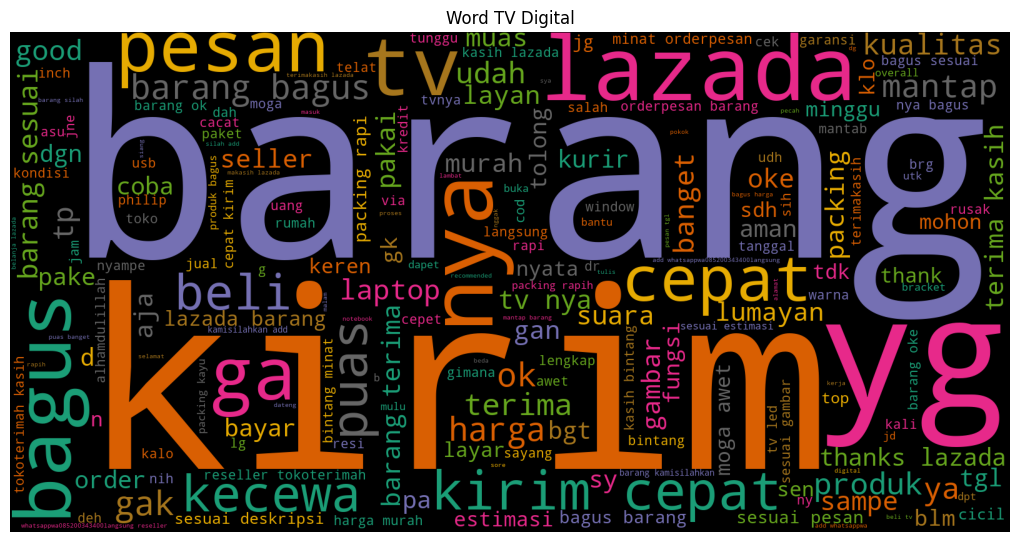

In [23]:
data_ = new_data_clean.loc[(new_data_clean['category'] == "shop-televisi-digital")]
word_ = pd.Series(' '.join(data_['review_stp_nltk']).split())
text = ' '.join(word_)

# Display the generated image:
wordcloud = WordCloud(background_color='black', mode="RGB", width=1600, height=800, colormap="Dark2").generate(text)
plt.figure(figsize=(10,10))
plt.title('Word TV Digital')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [24]:
def change_label (rating):
  if rating < 3 :
    return ('negative')
  elif rating == 3 :
    return ('netral')
  else :
    return ('positive')

In [25]:
new_data_clean['label'] = new_data_clean['rating'].apply(lambda x: change_label(x))

C:\Users\RanggaSaputra\AppData\Local\Temp\ipykernel_16912\732196972.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [26]:
new_data_clean['fit_label'] = LabelEncoder().fit_transform(new_data_clean['label'])

C:\Users\RanggaSaputra\AppData\Local\Temp\ipykernel_16912\1807233006.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [27]:
new_data_clean['fit_label'].value_counts()

2    15888
0     3570
1     1620
Name: fit_label, dtype: int64

In [28]:
#mengencoder label
new_data_clean.sort_values(by=['label'], inplace=True)
new_data_clean['label_id'] = new_data_clean['label'].factorize()[0]
kategori_id_data = new_data_clean[['label', 'label_id']].drop_duplicates().sort_values('label_id')
kategori_to_id = dict(kategori_id_data.values)
id_to_kategori = dict(kategori_id_data[['label_id', 'label']].values)

leng = kategori_id_data.label_id.values
leng = len (leng)

C:\Users\RanggaSaputra\AppData\Local\Temp\ipykernel_16912\3609019000.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\RanggaSaputra\AppData\Local\Temp\ipykernel_16912\3609019000.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [29]:
#split data
train, test = train_test_split(new_data_clean, test_size=0.25)

In [30]:
#x_train
count_vect = CountVectorizer()
X_train_stp_counts = count_vect.fit_transform(train['review_stp_nltk'])
tfidf_transformer = TfidfTransformer()
X_train_stp_tfidf = tfidf_transformer.fit_transform(X_train_stp_counts)

#y_train
y_list = list(train['fit_label'])
Y_train_stp = np.array(y_list)

In [31]:
print('train data : ', X_train_stp_tfidf.shape)
print('train label : ', Y_train_stp.shape)

train data :  (15808, 10372)
train label :  (15808,)


In [32]:
skf = StratifiedKFold(n_splits=5)
fold = 0
for train_index, test_index in skf.split(X_train_stp_tfidf, Y_train_stp):
  fold += 1
  X_train, X_test = X_train_stp_tfidf[train_index], X_train_stp_tfidf[test_index]
  y_train, y_test = Y_train_stp[train_index], Y_train_stp[test_index]
  print("Fold ke : ", fold)
  for c in [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 1]:
    svc_stp = SVC(C=c, kernel='linear')
    svc_stp.fit(X_train, y_train)
    predictions_svm_stp = svc_stp.predict(X_test)
    print("C = ", c, "Accuracy Score = ", accuracy_score(y_test,predictions_svm_stp)*100,'%')
  print("\n")

Fold ke :  1
C =  0.01 Accuracy Score =  75.4585705249842 %
C =  0.05 Accuracy Score =  77.32447817836811 %
C =  0.1 Accuracy Score =  79.82289690069577 %
C =  0.25 Accuracy Score =  85.23086654016446 %
C =  0.5 Accuracy Score =  87.98228969006958 %
C =  0.75 Accuracy Score =  89.59519291587603 %
C =  1 Accuracy Score =  90.44908285895004 %


Fold ke :  2
C =  0.01 Accuracy Score =  75.4585705249842 %
C =  0.05 Accuracy Score =  77.51423149905123 %
C =  0.1 Accuracy Score =  80.32890575585073 %
C =  0.25 Accuracy Score =  85.19924098671727 %
C =  0.5 Accuracy Score =  88.20366856419987 %
C =  0.75 Accuracy Score =  89.53194180898166 %
C =  1 Accuracy Score =  90.32258064516128 %


Fold ke :  3
C =  0.01 Accuracy Score =  75.426944971537 %
C =  0.05 Accuracy Score =  77.29285262492094 %
C =  0.1 Accuracy Score =  80.55028462998102 %
C =  0.25 Accuracy Score =  84.81973434535104 %
C =  0.5 Accuracy Score =  86.8437697659709 %
C =  0.75 Accuracy Score =  88.26691967109424 %
C =  1 Accurac

In [33]:
skf = StratifiedKFold(n_splits=5)
fold = 0
acc=[]
pcs=[]
rec=[]

for train_index, test_index in skf.split(X_train_stp_tfidf, Y_train_stp):
  fold += 1
#Bagi data buat kfold
  X_train, X_test = X_train_stp_tfidf[train_index], X_train_stp_tfidf[test_index]
  y_train, y_test = Y_train_stp[train_index], Y_train_stp[test_index]
  print("Fold ke : ", fold)
#model ML
  svm_stp = SVC(C=1, kernel='linear')
  svm_stp.fit(X_train, y_train)
  predictions_svm_stp = svm_stp.predict(X_test)
#Evaluasi
  acc.append(accuracy_score(y_test, predictions_svm_stp))
  pcs.append(precision_score(y_test, predictions_svm_stp, average='macro', zero_division=0))
  rec.append(recall_score(y_test, predictions_svm_stp, average='macro', zero_division=0))
  rec.append(f1_score(y_test, predictions_svm_stp, average='macro', zero_division=0))
        
  print(classification_report(y_test, predictions_svm_stp, zero_division=0))
  print(f'confusion matrix:\n {confusion_matrix(y_test, predictions_svm_stp)}')
  print('===============================================\n')
    
print(f'average akurasi: {np.mean(acc)}')
print(f'average presisi: {np.mean(pcs)}')
print(f'average recall: {np.mean(rec)}')
print(f'average f1-score: {np.mean(rec)}')

Fold ke :  1
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       529
           1       0.91      0.35      0.50       247
           2       0.91      0.98      0.95      2386

    accuracy                           0.90      3162
   macro avg       0.90      0.71      0.76      3162
weighted avg       0.90      0.90      0.89      3162

confusion matrix:
 [[ 430    2   97]
 [  31   86  130]
 [  36    6 2344]]

Fold ke :  2
              precision    recall  f1-score   support

           0       0.84      0.83      0.83       529
           1       0.87      0.30      0.45       247
           2       0.92      0.98      0.95      2386

    accuracy                           0.90      3162
   macro avg       0.88      0.70      0.74      3162
weighted avg       0.90      0.90      0.89      3162

confusion matrix:
 [[ 437    5   87]
 [  49   75  123]
 [  36    6 2344]]

Fold ke :  3
              precision    recall  f1-score   sup

In [34]:
"""start_time = datetime.now()

svc_stp = SVC(kernel='linear')
svc_stp.fit(X_train_stp_tfidf, Y_train_stp)

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))"""

"start_time = datetime.now()\n\nsvc_stp = SVC(kernel='linear')\nsvc_stp.fit(X_train_stp_tfidf, Y_train_stp)\n\nend_time = datetime.now()\nprint('Duration: {}'.format(end_time - start_time))"

In [35]:
'''a = count_vect.transform(test['review_stp_nltk'])
X_test_stp = tfidf_transformer.transform(a).toarray()
print (X_test_stp.shape)

Y_test_stp = list(test['fit_label'])'''

"a = count_vect.transform(test['review_stp_nltk'])\nX_test_stp = tfidf_transformer.transform(a).toarray()\nprint (X_test_stp.shape)\n\nY_test_stp = list(test['fit_label'])"

In [ ]:
text_predict = ['bagus-bagus aja sih', 'boleh lah ya', 'apaan nih barang ga sesuai banget']
df_predict = pd.DataFrame(text_predict, columns =['text'])
df_predict

In [ ]:
df_predict['text_clean']= df_predict['text'].apply(lambda x: str(x).lower())
df_predict['text_clean'] = df_predict['text_clean'].apply(lambda x: data_cleaning(x))
df_predict['text_steem'] = df_predict['text_clean'].apply(lambda x: stemmer.stem(x))
df_predict['text_stp_sastrawi'] = df_predict['text_steem'].apply(lambda x: " ".join(stopword.remove(x) for x in x.split() ))
df_predict['text_stp_nltk'] = df_predict['text_steem'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [ ]:
def predict (i):
    a = count_vect.transform([i])
    X_coba = tfidf_transformer.transform(a).toarray()
    y_pred = svc_stp.predict(X_coba)
    y_label = id_to_kategori[y_pred[0]]
    return (y_label)

def predict_stp (i):
    a = count_vect.transform([i])
    X_coba = tfidf_transformer.transform(a).toarray()
    y_pred = svc_stp.predict(X_coba)
    y_label = id_to_kategori[y_pred[0]]
    return (y_label)

In [ ]:
df_predict['predict_label'] = df_predict['text_steem'].apply(lambda x : predict(x))
df_predict['predict_label_stp'] = df_predict['text_steem'].apply(lambda x : predict_stp(x))

In [ ]:
df_predict[['text','predict_label','predict_label_stp']]